# Задача 2:
* Проведите аналитику полученных данных
* Подготовьте данные для модели классификации
* Обучите модель классификации и осуществите прогноз для отложенной выборки с учетомо перекоса в данных TARGET
* Оцените качество модели с помощью функции f1_score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_classification_for_task.csv')

* AGE: возраст пациента
* GENDER: пол пациента
* FEATURE1-11: характеристики здоровья сердечно-сосудстой системы пациента
* TARGET: болен/не болен (целевая переменная)

In [3]:
df.head()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         303 non-null    int64  
 1   GENDER      303 non-null    int64  
 2   FEATURE_1   303 non-null    int64  
 3   FEATURE_2   303 non-null    int64  
 4   FEATURE_3   303 non-null    int64  
 5   FEATURE_4   303 non-null    int64  
 6   FEATURE_5   303 non-null    int64  
 7   FEATURE_6   303 non-null    int64  
 8   FEATURE_7   303 non-null    int64  
 9   FEATURE_8   303 non-null    float64
 10  FEATURE_9   303 non-null    int64  
 11  FEATURE_10  303 non-null    int64  
 12  FEATURE_11  303 non-null    int64  
 13  TARGET      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Пропусков в данных нет

In [5]:
df['TARGET'].value_counts()

1    165
0    138
Name: TARGET, dtype: int64

Небольшой дисбаланс классов, но это не критично, можно работать далее с ними

In [6]:
df['AGE'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: AGE, dtype: float64

В выборке люди в среднем 54х лет, самый молодой 29 лет, а самый взрослый 77 лет. Разброс значений не высокий.

In [7]:
df.groupby(['AGE'])['TARGET'].sum().sort_values().tail()

AGE
44     8
41     9
51     9
52     9
54    10
Name: TARGET, dtype: int64

Больше всего больных в выборке в возрасте 51-54 года

In [8]:
df['GENDER'].value_counts()

1    207
0     96
Name: GENDER, dtype: int64

По полу есть сильный дисбаланс

In [9]:
df[df['GENDER'] == 1]['TARGET'].sum() / df[df['GENDER'] == 1]['TARGET'].count(), \
df[df['GENDER'] == 0]['TARGET'].sum() / df[df['GENDER'] == 0]['TARGET'].count()

(0.4492753623188406, 0.75)

44% больных пола 1 и 75% больных пола 0 - это очень важный признак.

In [10]:
df['FEATURE_1'].unique()

array([3, 2, 1, 0], dtype=int64)

In [11]:
df.groupby(['FEATURE_1'])['TARGET'].sum() / df.groupby(['FEATURE_1'])['TARGET'].count()

FEATURE_1
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: TARGET, dtype: float64

Данный признак хорошо помогает классифицировать здоровых: 0 - скорее всего здоров, иначе - скорее всего болен

In [12]:
df['FEATURE_2'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [13]:
df.groupby(['FEATURE_2'])['TARGET'].sum().sort_values().head()

FEATURE_2
200    0
192    0
144    0
174    0
165    0
Name: TARGET, dtype: int64

In [14]:
df.groupby(['FEATURE_2'])['TARGET'].sum().sort_values().tail()

FEATURE_2
150     9
138    10
140    17
120    23
130    23
Name: TARGET, dtype: int64

Признак тоже обладает хорошей разделительной способностью

In [15]:
df['FEATURE_3'].nunique() # аналогично предыдущим

152

In [16]:
df['FEATURE_4'].value_counts()

0    258
1     45
Name: FEATURE_4, dtype: int64

In [17]:
df[df['FEATURE_4'] == 1]['TARGET'].sum() / df[df['FEATURE_4'] == 1]['TARGET'].count(), \
df[df['FEATURE_4'] == 0]['TARGET'].sum() / df[df['FEATURE_4'] == 0]['TARGET'].count()

(0.5111111111111111, 0.5503875968992248)

Этот признак кажется не самым хорошим, так как и с 0 и с 1 у него по 50% больных людей

In [18]:
df['FEATURE_5'].unique()

array([0, 1, 2], dtype=int64)

In [19]:
df.groupby(['FEATURE_5'])['TARGET'].sum()

FEATURE_5
0    68
1    96
2     1
Name: TARGET, dtype: int64

In [20]:
df.groupby(['FEATURE_5'])['TARGET'].count()

FEATURE_5
0    147
1    152
2      4
Name: TARGET, dtype: int64

у FEATURE_5=2 почти нет наблюдений, а, 0 и 1 примерно одинаково отлавливают класс, значит это тоже не самая хорошая фича

In [21]:
df['FEATURE_6'].nunique() # аналогично предыдущим схожим с ней

91

In [22]:
df.groupby(['FEATURE_7'])['TARGET'].sum() / df.groupby(['FEATURE_7'])['TARGET'].count()

FEATURE_7
0    0.696078
1    0.232323
Name: TARGET, dtype: float64

хорошая разделяющая способность у фичи

In [23]:
df['FEATURE_8'].nunique()

40

In [24]:
df.groupby(['FEATURE_9'])['TARGET'].sum()

FEATURE_9
0      9
1     49
2    107
Name: TARGET, dtype: int64

Мало значений у класса 0

In [25]:
df.groupby(['FEATURE_10'])['TARGET'].sum()

FEATURE_10
0    130
1     21
2      7
3      3
4      4
Name: TARGET, dtype: int64

In [26]:
df.groupby(['FEATURE_11'])['TARGET'].sum()

FEATURE_11
0      1
1      6
2    130
3     28
Name: TARGET, dtype: int64

Тоже какие-то неплохо разделяющие факторы

### Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1), df['TARGET'], 
                                                    test_size=0.3, random_state=42) 

Начнем с базовой модели простых правил из EDA

In [28]:
test_pred = np.where(((X_test['AGE'] >=44) & (X_test['AGE'] <=65)) | (X_test['GENDER'] == 0), 1, 0)

In [29]:
f1_score(y_test, test_pred)

0.6771653543307087

Посмотрим на решающее дерево

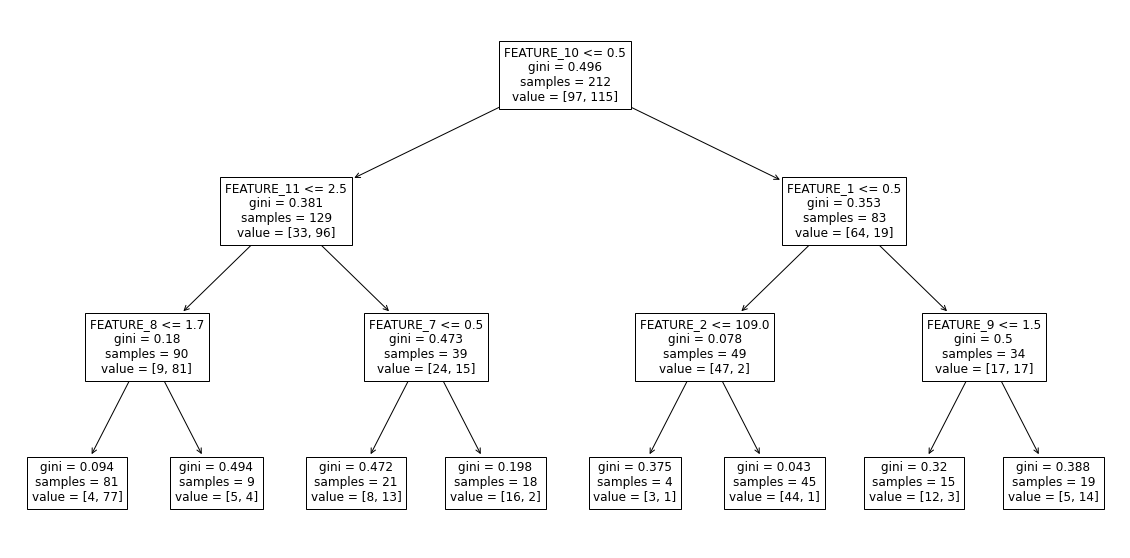

In [48]:
%matplotlib inline

from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plot_tree(model, feature_names=X_train.columns)
plt.show()

Самой разделительной фичей оказалась 10я, далее 1 и 11. Возраст и пол не вошли в самые обобщающие фичи.

In [54]:
# для отладки гиперпараметров
X_train_train, X_train_val, y_train_tain, y_train_val = train_test_split(X_train, y_train, 
                                                    test_size=0.3, random_state=42) 

In [56]:
for n in range(1,10):
    q = f1_score(y_train_val, DecisionTreeClassifier(max_depth=n, random_state=42).fit(X_train_train, y_train_tain).predict(X_train_val))
    print(f'{n} : {q}')

1 : 0.7352941176470588
2 : 0.7419354838709677
3 : 0.8285714285714286
4 : 0.7058823529411765
5 : 0.7142857142857143
6 : 0.6666666666666667
7 : 0.6470588235294118
8 : 0.6666666666666667
9 : 0.6666666666666667


In [58]:
f1_score(y_test, DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train).predict(X_test))

0.7835051546391754

In [69]:
# подбор порога
for t in np.arange(0.1,1,0.1):
    q = f1_score(y_test, DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train).predict_proba(X_test)[:,1] >= t)
    print(f'{t} : {q}')

0.1 : 0.8495575221238937
0.2 : 0.851851851851852
0.30000000000000004 : 0.8235294117647058
0.4 : 0.8235294117647058
0.5 : 0.7835051546391754
0.6 : 0.7835051546391754
0.7000000000000001 : 0.7555555555555556
0.8 : 0.6075949367088608
0.9 : 0.6075949367088608


In [70]:
f1_score(y_test, DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train).predict_proba(X_test)[:,1] >= 0.2)

0.851851851851852

Улучшился скор, по-сравнению с бейзлайном

Теперь попробуем случайный лес, так как у нас отличные фичи для решающих правил, деревья должны подойти

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = RandomForestClassifier(n_estimators=350, max_depth=2, random_state=0)

In [75]:
clf.fit(X_train_train, y_train_tain)

RandomForestClassifier(max_depth=2, n_estimators=350, random_state=0)

In [76]:
pred = clf.predict_proba(X_train_val)[:,1]

In [78]:
# подбор порога
for t in np.arange(0.1,1,0.1):
    q = f1_score(y_train_val, pred >= t)
    print(f'{t} : {q}')

0.1 : 0.6666666666666666
0.2 : 0.7111111111111111
0.30000000000000004 : 0.7469879518072288
0.4 : 0.7848101265822784
0.5 : 0.821917808219178
0.6 : 0.7741935483870969
0.7000000000000001 : 0.7169811320754718
0.8 : 0.5116279069767442
0.9 : 0.0


In [80]:
f1_score(y_train_val, pred >= 0.5)

0.821917808219178

Теперь применим ко всему трейну и посчитаем качество на тесте

In [81]:
# порог по умолчанию 0.5
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)

In [82]:
f1_score(y_test, test_pred)

0.8543689320388349

RF дал качество выше, попробуем теперь бустинг

In [83]:
import xgboost

In [87]:
boosting_model = xgboost.XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=0) 

boosting_model.fit(X_train_train, y_train_tain)
pred = boosting_model.predict_proba(X_train_val)[:,1]

In [89]:
# подбор порога
for t in np.arange(0.1,1,0.1):
    q = f1_score(y_train_val, pred >= t)
    print(f'{t} : {q}')

0.1 : 0.6966292134831461
0.2 : 0.7792207792207793
0.30000000000000004 : 0.7945205479452054
0.4 : 0.7941176470588235
0.5 : 0.8
0.6 : 0.7419354838709677
0.7000000000000001 : 0.711864406779661
0.8 : 0.6545454545454547
0.9 : 0.5


In [90]:
f1_score(y_train_val, pred >= 0.5)

0.8

In [91]:
boosting_model.fit(X_train, y_train)
test_pred = boosting_model.predict(X_test)

In [92]:
f1_score(y_test, test_pred)

0.8282828282828283

Бустинг дал качество похуже, чем случайный лес  
Посмотрим еще на катбуст

In [93]:
import catboost

In [94]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             eval_metric='F1')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20), 
                            'learning_rate':[0.01,0.05,0.1], 
                            'max_depth':[3,5,8]}, 
                           X_train_train, 
                           y_train_tain, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9714285714
bestIteration = 25

0:	loss: 0.9714286	best: 0.9714286 (0)	total: 326ms	remaining: 58.4s

bestTest = 0.9444444444
bestIteration = 9

1:	loss: 0.9444444	best: 0.9714286 (0)	total: 420ms	remaining: 37.4s

bestTest = 0.9189189189
bestIteration = 2

2:	loss: 0.9189189	best: 0.9714286 (0)	total: 509ms	remaining: 30s

bestTest = 0.9444444444
bestIteration = 5

3:	loss: 0.9444444	best: 0.9714286 (0)	total: 611ms	remaining: 26.9s

bestTest = 0.9714285714
bestIteration = 4

4:	loss: 0.9714286	best: 0.9714286 (0)	total: 701ms	remaining: 24.5s

bestTest = 0.9189189189
bestIteration = 11

5:	loss: 0.9189189	best: 0.9714286 (0)	total: 818ms	remaining: 23.7s

bestTest = 0.9444444444
bestIteration = 5

6:	loss: 0.9444444	best: 0.9714286 (0)	total: 937ms	remaining: 23.2s

bestTest = 0.9714285714
bestIteration = 4

7:	loss: 0.9714286	best: 0.9714286 (0)	total: 1.06s	remaining: 22.9s

bestTest = 0.9142857143
bestIteration = 0

8:	loss: 0.9142857	best: 0.9714286 (0)	total: 1.25s	


bestTest = 0.8888888889
bestIteration = 7

74:	loss: 0.8888889	best: 0.9714286 (0)	total: 10s	remaining: 14s

bestTest = 0.8888888889
bestIteration = 92

75:	loss: 0.8888889	best: 0.9714286 (0)	total: 10.2s	remaining: 13.9s

bestTest = 0.8648648649
bestIteration = 2

76:	loss: 0.8648649	best: 0.9714286 (0)	total: 10.3s	remaining: 13.8s

bestTest = 0.8888888889
bestIteration = 2

77:	loss: 0.8888889	best: 0.9714286 (0)	total: 10.4s	remaining: 13.7s

bestTest = 0.8888888889
bestIteration = 17

78:	loss: 0.8888889	best: 0.9714286 (0)	total: 10.6s	remaining: 13.6s

bestTest = 0.8648648649
bestIteration = 2

79:	loss: 0.8648649	best: 0.9714286 (0)	total: 10.8s	remaining: 13.4s

bestTest = 0.8888888889
bestIteration = 7

80:	loss: 0.8888889	best: 0.9714286 (0)	total: 10.9s	remaining: 13.3s

bestTest = 0.8888888889
bestIteration = 54

81:	loss: 0.8888889	best: 0.9714286 (0)	total: 11s	remaining: 13.2s

bestTest = 0.8648648649
bestIteration = 2

82:	loss: 0.8648649	best: 0.9714286 (0)	total: 


bestTest = 0.8888888889
bestIteration = 6

146:	loss: 0.8888889	best: 0.9714286 (0)	total: 24.7s	remaining: 5.55s

bestTest = 0.9142857143
bestIteration = 5

147:	loss: 0.9142857	best: 0.9714286 (0)	total: 25s	remaining: 5.41s

bestTest = 0.9142857143
bestIteration = 4

148:	loss: 0.9142857	best: 0.9714286 (0)	total: 25.3s	remaining: 5.26s

bestTest = 0.8571428571
bestIteration = 0

149:	loss: 0.8571429	best: 0.9714286 (0)	total: 25.6s	remaining: 5.13s

bestTest = 0.9142857143
bestIteration = 5

150:	loss: 0.9142857	best: 0.9714286 (0)	total: 26s	remaining: 5s

bestTest = 0.9142857143
bestIteration = 4

151:	loss: 0.9142857	best: 0.9714286 (0)	total: 26.4s	remaining: 4.87s

bestTest = 0.8571428571
bestIteration = 0

152:	loss: 0.8571429	best: 0.9714286 (0)	total: 26.8s	remaining: 4.73s

bestTest = 0.9142857143
bestIteration = 5

153:	loss: 0.9142857	best: 0.9714286 (0)	total: 27.1s	remaining: 4.58s

bestTest = 0.9142857143
bestIteration = 4

154:	loss: 0.9142857	best: 0.9714286 (0)	to

{'params': {'depth': 3, 'learning_rate': 0.01, 'l2_leaf_reg': 0.0},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
  

In [95]:
boosting_model = catboost.CatBoostClassifier(n_estimators=300, silent=True,
                                             eval_metric='F1', l2_leaf_reg=0.05, max_depth=3, learning_rate=0.05)

In [96]:
boosting_model.fit(X_train_train, y_train_tain)
pred = boosting_model.predict_proba(X_train_val)[:,1]

In [98]:
# подбор порога
for t in np.arange(0.1,1,0.1):
    q = f1_score(y_train_val, pred >= t)
    print(f'{t} : {q}')

0.1 : 0.7466666666666667
0.2 : 0.7887323943661971
0.30000000000000004 : 0.7761194029850748
0.4 : 0.7761194029850748
0.5 : 0.787878787878788
0.6 : 0.787878787878788
0.7000000000000001 : 0.7692307692307692
0.8 : 0.7333333333333334
0.9 : 0.6666666666666666


In [99]:
f1_score(y_train_val, pred >= 0.2)

0.7887323943661971

In [103]:
boosting_model.fit(X_train, y_train)
test_pred = boosting_model.predict_proba(X_test)[:,1]
f1_score(y_test, test_pred >= 0.2)

0.8333333333333334

Самый высокий скор дал RF 0.85